In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')

Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(64, activation='relu'))

In [13]:
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4891 - accuracy: 0.8222 - val_loss: 0.4014 - val_accuracy: 0.8570
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3150 - accuracy: 0.8857 - val_loss: 0.3218 - val_accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2691 - accuracy: 0.9017 - val_loss: 0.3038 - val_accuracy: 0.8922
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2391 - accuracy: 0.9125 - val_loss: 0.2604 - val_accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2147 - accuracy: 0.9211 - val_loss: 0.2664 - val_accuracy: 0.9075
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1936 - accuracy: 0.9290 - val_loss: 0.2764 - val_accuracy: 0.9049
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1773 - accuracy: 0.9334 - val_loss: 0.2593 -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - loss: 0.2919 - accuracy: 0.9098 - 3s/epoch - 10ms/step

Test accuracy: 0.9097999930381775


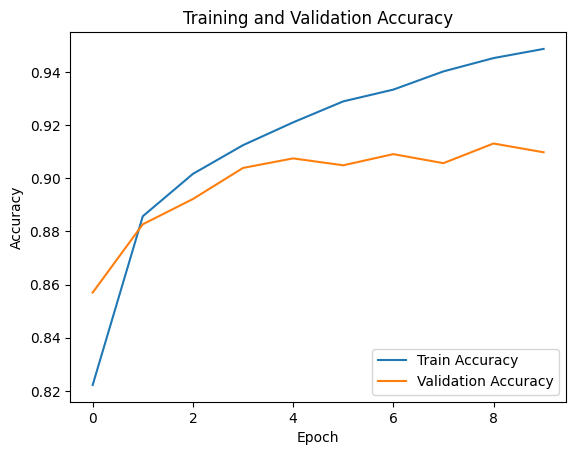

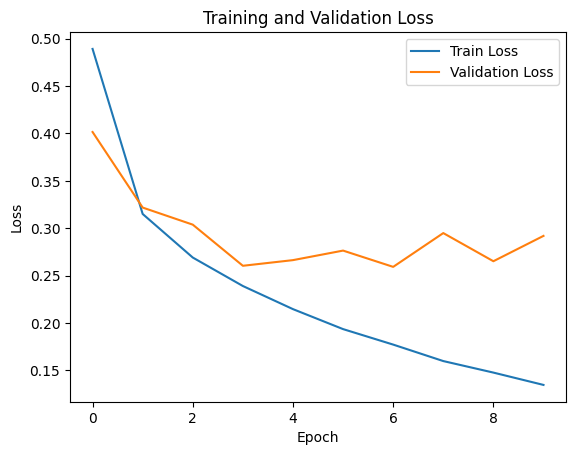

In [17]:
# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()